In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


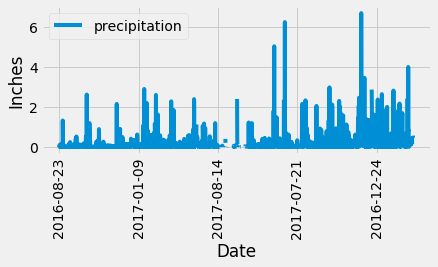

In [114]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data, columns = ["date", "precipitation"])
data_df.sort_values(by="date")
data_df.set_index("date")
data_df.head(-10)
# Use Pandas Plotting with Matplotlib to plot the data

data_df.plot(rot=90, x = 'date', y = 'precipitation')
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()



In [80]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station).count()
print(total_stations)

9


In [109]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active = session.query(measurement.station, func.count(measurement.date)).\
    group_by(measurement.station).\
    order_by(func.sum(measurement.date).desc()).all()
print(most_active)
print(most_active[0][0])

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281


In [110]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active[0][0]
most_active_station_data = session.query(func.min(measurement.tobs), 
                                         func.max(measurement.tobs), 
                                         func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()
print(most_active_station_data)

[(54.0, 85.0, 71.66378066378067)]


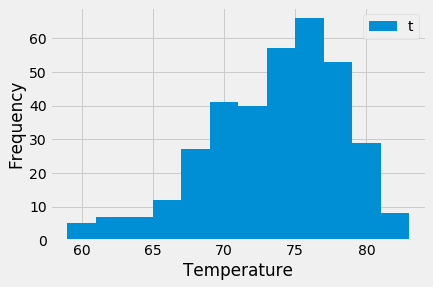

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_data = session.query(measurement.tobs).filter(measurement.station == most_active_station).\
                filter(measurement.date >= year_ago).all()
last_year_data_df = pd.DataFrame(last_year_data, columns=["tobs"])

plt.hist(last_year_data_df["tobs"], bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()